In [30]:
import pandas as pd # import pandas
import numpy as np # import numpy
import requests# needs requests functions to call api
import pprint # pretty print
import json
import seaborn as sb
import matplotlib.pyplot as plt # dont think I even need this
import pprint

# Sources
    https://data.census.gov/cedsci/
    https://www.bouldercounty.org/property-and-land/assessor/data-download/
    https://www.climate.gov/maps-data/dataset/past-weather-zip-code-data-table
    https://data.colorado.gov/
    https://openweathermap.org/current
    


In [9]:
# what I am looking at with my project is how covid data from Boulder
# relates to other cities or towns  and see how weather and how
# certain aspects within weather like humidity, and high and lows affect
# the Covid 19 spread within these areas. Boulder is super interesting location
# to look at as since it is located in the desert, there is crazy fluxuation
# in high and low temperatures every day due to the polarization that
# deserts and the sun combined bring to Boulder. I am looking to compare to
# a area that has a stable weather pattern and overall similar weather
# all year around, meaning not a seasonal place. So So-Cal is a great option
# that is pretty much the opposite of Colorado in terms of weather fluxuation.
# as it is located in a dessert and the weather changes super rapidly
# For Colorado, during the day it warms up alot to around 50 degrees right now and at night
# it heavily dips to often times below freezing, so with this influx

# Hypothesis:
    Areas with higher fluxuation in weather throughout the day will have a higher number of covid cases vs an area with stable weather patterns throughout the day. Boulders high and low temps will provide more current covid results than California, where there are minimal fluxations in weather throughout the day and year. So Colorado will show more positive case results than California

# side note: Boulder covid specific data was very hard to find in terms of how in depth in was compared to Colorados overall data so that is why I used Colorado instead of Boulder, moreover I still look specifically at Boulder later in my code.

In [5]:
# looking at the overall dataset to start
pd.options.display.max_columns = 500
covid1 = pd.read_csv("all-states-history.csv")
pprint.pprint(covid1)
# might use this other data set to better look at just colorado data3

             date state dataQualityGrade   death  deathConfirmed  \
0      2020-11-20    AK                A   101.0           101.0   
1      2020-11-20    AL                A  3451.0          3148.0   
2      2020-11-20    AR               A+  2321.0          2125.0   
3      2020-11-20    AS                D     0.0             NaN   
4      2020-11-20    AZ               A+  6427.0          5961.0   
...           ...   ...              ...     ...             ...   
14724  2020-01-24    WA              NaN     NaN             NaN   
14725  2020-01-23    MA              NaN     NaN             NaN   
14726  2020-01-23    WA              NaN     NaN             NaN   
14727  2020-01-22    MA              NaN     NaN             NaN   
14728  2020-01-22    WA              NaN     NaN             NaN   

       deathIncrease  deathProbable  hospitalized  hospitalizedCumulative  \
0                  0            NaN         606.0                   606.0   
1                 32         

In [6]:
# now looking at the most current date for covid data that we have present
mostCurrent = covid1.head(56)
mostCurrent
# OK so each date has reports from every state
# so I made the mostCurrent variable return the most recent dates
# report which is 11/20/2020.

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,negativeTestsAntibody,negativeTestsPeopleAntibody,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsAntigen,positiveTestsPeopleAntibody,positiveTestsPeopleAntigen,positiveTestsViral,recovered,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-11-20,AK,A,101.0,101.0,0,NaN,606.0,606.0,127.0,13,NaN,NaN,879343.0,5453,NaN,NaN,874013.0,NaN,15.0,25369.0,NaN,460,0,NaN,NaN,NaN,NaN,30178.0,7165.0,NaN,0,904712.0,5913,NaN,NaN,NaN,NaN,NaN,0,904712.0,5913
1,2020-11-20,AL,A,3451.0,3148.0,32,303.0,23449.0,23449.0,1329.0,154,2189.0,NaN,1316804.0,9548,NaN,NaN,NaN,1265.0,NaN,228373.0,191408.0,2463,0,NaN,NaN,NaN,NaN,NaN,90702.0,NaN,0,1508212.0,11495,NaN,NaN,69249.0,NaN,NaN,0,1508212.0,11495
2,2020-11-20,AR,A+,2321.0,2125.0,24,196.0,8353.0,8353.0,928.0,85,NaN,359.0,1440090.0,11805,NaN,NaN,1440090.0,932.0,146.0,141916.0,125783.0,2061,0,NaN,3300.0,NaN,19098.0,NaN,122219.0,NaN,0,1565873.0,13423,NaN,21856.0,NaN,112784.0,NaN,0,1565873.0,13423
3,2020-11-20,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,1988.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1988.0,0,NaN,NaN,NaN,NaN,NaN,0,1988.0,0
4,2020-11-20,AZ,A+,6427.0,5961.0,43,466.0,24052.0,24052.0,1835.0,181,NaN,431.0,1780492.0,22422,NaN,NaN,NaN,NaN,244.0,291696.0,283397.0,4471,0,NaN,NaN,NaN,NaN,NaN,47383.0,NaN,0,2063889.0,26601,355101.0,NaN,NaN,NaN,2063889.0,26601,NaN,0
5,2020-11-20,CA,B,18557.0,NaN,91,NaN,NaN,NaN,5497.0,0,NaN,1332.0,20658279.0,165018,NaN,NaN,NaN,NaN,NaN,1072272.0,1072272.0,13005,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,21730551.0,178023,NaN,NaN,NaN,NaN,NaN,0,21730551.0,178023
6,2020-11-20,CO,A,2355.0,NaN,5,NaN,12166.0,12166.0,1723.0,186,NaN,NaN,1384398.0,20692,180596.0,NaN,NaN,NaN,NaN,188566.0,179340.0,5765,0,15262.0,NaN,NaN,NaN,NaN,10618.0,2752718.0,57018,2752718.0,57018,195858.0,NaN,NaN,NaN,1563738.0,26379,NaN,0
7,2020-11-20,CT,C,4828.0,3878.0,23,950.0,12257.0,12257.0,848.0,0,NaN,NaN,2827591.0,29692,NaN,NaN,NaN,NaN,NaN,101469.0,94426.0,2088,0,NaN,NaN,NaN,NaN,NaN,9800.0,NaN,0,2929060.0,31780,NaN,26512.0,NaN,NaN,NaN,0,2922017.0,31493
8,2020-11-20,DC,A+,669.0,NaN,2,NaN,NaN,NaN,126.0,0,NaN,28.0,592396.0,4240,NaN,NaN,NaN,NaN,11.0,19808.0,NaN,130,0,NaN,NaN,NaN,NaN,NaN,14699.0,612204.0,4370,612204.0,4370,NaN,NaN,NaN,NaN,283503.0,1289,NaN,0
9,2020-11-20,DE,A+,746.0,655.0,4,91.0,NaN,NaN,170.0,0,NaN,26.0,362466.0,3598,NaN,NaN,NaN,NaN,NaN,30816.0,29511.0,663,0,NaN,NaN,NaN,NaN,31835.0,15534.0,659454.0,16112,659454.0,16112,NaN,NaN,NaN,NaN,393282.0,4261,NaN,0


In [50]:
newPlot = mostCurrent[['state','positiveIncrease','totalTestResultsIncrease']].sort_values('state',ascending =True)
newPlot

,state,positiveIncrease,totalTestResultsIncrease
0,AK,460,5913
1,AL,2463,11495
2,AR,2061,13423
3,AS,0,0
4,AZ,4471,26601
5,CA,13005,178023
6,CO,5765,57018
7,CT,2088,31780
8,DC,130,4370
9,DE,663,16112


<AxesSubplot:xlabel='state'>

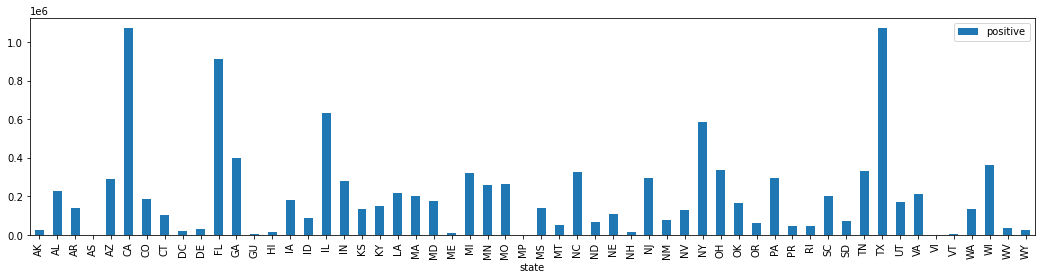

In [64]:
#plotting the covid ranking between states, 1 are high number of cases, while towards 0 signifies less cases
# also for the Y axis the numbers are percentages out of 100%
mostCurrent.plot.bar(x='state', y = 'positive', figsize=(18,4)) # axis pulls from the state colum, y pulls from the positive column
# and then we specified the fig size to in order to correctly format and present the data
#mostCurrent.autoscale(enable=True, axis='x', tight=True)#plt.axis('tight')

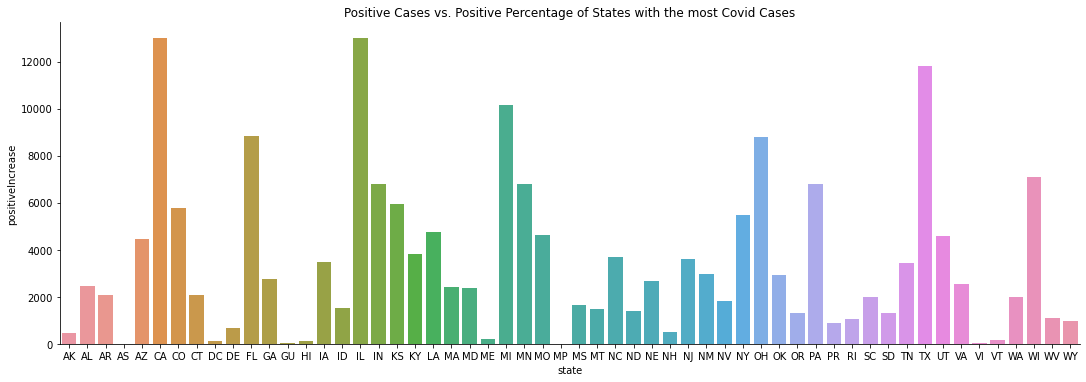

In [65]:
sb.catplot(x="state",y="positiveIncrease",data=newPlot,aspect=3,kind="bar").set(title='Positive Cases vs. Positive Percentage of States with the most Covid Cases')


In [8]:
# So I want to look at the total number of test results and see how they have increased
# and see how accurate this table is to google data
# so I will return the total test result increase as that should be 
# equal to the # of new cases on googles Covid-19 search
mostCurrent['totalTestResultsIncrease'].sum()
# total test results across America

1917476

In [9]:
# now looking at Colorado Specific Data
coData = mostCurrent.iloc[6]
# cannot get boulder specific information in the same level of depth so that is why I do not mind using overall Colorado instead
# of Boulder, I hope that makes sense
print(coData)
# this shows only Colorados data that was collected on this date
# as each state is assigned to an iloc key

date                                 2020-11-20
state                                        CO
dataQualityGrade                              A
death                                      2355
deathConfirmed                              NaN
deathIncrease                                 5
deathProbable                               NaN
hospitalized                              12166
hospitalizedCumulative                    12166
hospitalizedCurrently                      1723
hospitalizedIncrease                        186
inIcuCumulative                             NaN
inIcuCurrently                              NaN
negative                             1.3844e+06
negativeIncrease                          20692
negativeTestsAntibody                    180596
negativeTestsPeopleAntibody                 NaN
negativeTestsViral                          NaN
onVentilatorCumulative                      NaN
onVentilatorCurrently                       NaN
positive                                

In [10]:
# Now I want to look at just the positive increase in Colorado as
# this correlates to the new cases search on Googles Covid-19 application
coPos = coData['positiveIncrease'] # positive increases from the most recent date which was Nov 20th
print("The number of new positive cases is equal to " + str(coPos) + " cases in Colorado on November 20th 2020")


The number of new positive cases is equal to 5765 cases in Colorado on November 20th 2020


In [33]:
#pip install google-search
#import GoogleSearch
# was going to use the google api to look at boulder covid data but urllib2
# is not installed and apparently it has a security breach so I dont think
# this is a good tool to use
#response = GoogleSearch().search("Boulder covid results")
#for result in response.results:
 #   print("Title: " + result.title)
  #  print("Content: " + result.getText())

ModuleNotFoundError: No module named 'GoogleSearch'

In [11]:
highestToLowest = covid1[["state","positive","totalTestResults","inIcuCurrently"]].sort_values("totalTestResults",ascending=False).head(100)
highestToLowest["Positive Percent"] = covid1["positive"]/covid1["totalTestResults"]
print(highestToLowest) # adds a new column that gives a better representation of our
# covid data and the positive impact comapared to the whole population
# trying to manipulate and create a new variable that is the positive cases/total test results

     state   positive  totalTestResults  inIcuCurrently  Positive Percent
5       CA  1072272.0        21730551.0          1332.0          0.049344
61      CA  1059267.0        21552528.0          1253.0          0.049148
117     CA  1047789.0        21418543.0          1258.0          0.048920
173     CA  1037978.0        21259076.0          1206.0          0.048825
229     CA  1029235.0        21068894.0          1131.0          0.048851
...    ...        ...               ...             ...               ...
3589    CA   766201.0        13080037.0           997.0          0.058578
1773    NY   486480.0        13072715.0           194.0          0.037213
3645    CA   762963.0        13000522.0          1032.0          0.058687
1829    NY   485279.0        12982175.0           198.0          0.037380
3701    CA   760013.0        12928170.0          1044.0          0.058787

[100 rows x 5 columns]


In [34]:
# In this if you look at the last row I made a new variable
# that is equal to the percent chance you have of contracting
# covid in relationship to the rest of the state and the relationship
# between total test results and positive cases
covidInfectionPercentageInCo = coData[["totalTestResultsIncrease","positiveIncrease"]]
coData["probability of contracting Covid-19"] = coData["positiveIncrease"]/coData["totalTestResultsIncrease"]
coData
# for this I made a new variable called Probability of contracting Covid-19
# this takes and divides the positive increase by the total number of case results

<ipython-input-34-7a57991976cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coData["probability of contracting Covid-19"] = coData["positiveIncrease"]/coData["totalTestResultsIncrease"]


date                                    2020-11-20
state                                           CO
dataQualityGrade                                 A
death                                         2355
deathConfirmed                                 NaN
deathIncrease                                    5
deathProbable                                  NaN
hospitalized                                 12166
hospitalizedCumulative                       12166
hospitalizedCurrently                         1723
hospitalizedIncrease                           186
inIcuCumulative                                NaN
inIcuCurrently                                 NaN
negative                                1.3844e+06
negativeIncrease                             20692
negativeTestsAntibody                       180596
negativeTestsPeopleAntibody                    NaN
negativeTestsViral                             NaN
onVentilatorCumulative                         NaN
onVentilatorCurrently          

In [13]:
#now just to look at the probrability percentage
probs = coData["probability of contracting Covid-19"]
print("The probability that you contract Covid-19 in Colorado is " + str(probs) + "%")

The probability that you contract Covid-19 in Colorado is 0.10110842190185555%


In [40]:
mostCurrent.groupby(['dataQualityGrade'])
mostCurrent

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,negativeTestsAntibody,negativeTestsPeopleAntibody,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsAntigen,positiveTestsPeopleAntibody,positiveTestsPeopleAntigen,positiveTestsViral,recovered,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-11-20,AK,A,101.0,101.0,0,NaN,606.0,606.0,127.0,13,NaN,NaN,879343.0,5453,NaN,NaN,874013.0,NaN,15.0,25369.0,NaN,460,0,NaN,NaN,NaN,NaN,30178.0,7165.0,NaN,0,904712.0,5913,NaN,NaN,NaN,NaN,NaN,0,904712.0,5913
1,2020-11-20,AL,A,3451.0,3148.0,32,303.0,23449.0,23449.0,1329.0,154,2189.0,NaN,1316804.0,9548,NaN,NaN,NaN,1265.0,NaN,228373.0,191408.0,2463,0,NaN,NaN,NaN,NaN,NaN,90702.0,NaN,0,1508212.0,11495,NaN,NaN,69249.0,NaN,NaN,0,1508212.0,11495
2,2020-11-20,AR,A+,2321.0,2125.0,24,196.0,8353.0,8353.0,928.0,85,NaN,359.0,1440090.0,11805,NaN,NaN,1440090.0,932.0,146.0,141916.0,125783.0,2061,0,NaN,3300.0,NaN,19098.0,NaN,122219.0,NaN,0,1565873.0,13423,NaN,21856.0,NaN,112784.0,NaN,0,1565873.0,13423
3,2020-11-20,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,1988.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1988.0,0,NaN,NaN,NaN,NaN,NaN,0,1988.0,0
4,2020-11-20,AZ,A+,6427.0,5961.0,43,466.0,24052.0,24052.0,1835.0,181,NaN,431.0,1780492.0,22422,NaN,NaN,NaN,NaN,244.0,291696.0,283397.0,4471,0,NaN,NaN,NaN,NaN,NaN,47383.0,NaN,0,2063889.0,26601,355101.0,NaN,NaN,NaN,2063889.0,26601,NaN,0
5,2020-11-20,CA,B,18557.0,NaN,91,NaN,NaN,NaN,5497.0,0,NaN,1332.0,20658279.0,165018,NaN,NaN,NaN,NaN,NaN,1072272.0,1072272.0,13005,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,21730551.0,178023,NaN,NaN,NaN,NaN,NaN,0,21730551.0,178023
6,2020-11-20,CO,A,2355.0,NaN,5,NaN,12166.0,12166.0,1723.0,186,NaN,NaN,1384398.0,20692,180596.0,NaN,NaN,NaN,NaN,188566.0,179340.0,5765,0,15262.0,NaN,NaN,NaN,NaN,10618.0,2752718.0,57018,2752718.0,57018,195858.0,NaN,NaN,NaN,1563738.0,26379,NaN,0
7,2020-11-20,CT,C,4828.0,3878.0,23,950.0,12257.0,12257.0,848.0,0,NaN,NaN,2827591.0,29692,NaN,NaN,NaN,NaN,NaN,101469.0,94426.0,2088,0,NaN,NaN,NaN,NaN,NaN,9800.0,NaN,0,2929060.0,31780,NaN,26512.0,NaN,NaN,NaN,0,2922017.0,31493
8,2020-11-20,DC,A+,669.0,NaN,2,NaN,NaN,NaN,126.0,0,NaN,28.0,592396.0,4240,NaN,NaN,NaN,NaN,11.0,19808.0,NaN,130,0,NaN,NaN,NaN,NaN,NaN,14699.0,612204.0,4370,612204.0,4370,NaN,NaN,NaN,NaN,283503.0,1289,NaN,0
9,2020-11-20,DE,A+,746.0,655.0,4,91.0,NaN,NaN,170.0,0,NaN,26.0,362466.0,3598,NaN,NaN,NaN,NaN,NaN,30816.0,29511.0,663,0,NaN,NaN,NaN,NaN,31835.0,15534.0,659454.0,16112,659454.0,16112,NaN,NaN,NaN,NaN,393282.0,4261,NaN,0


In [15]:
#top5States = highestToLowest[["state","positive","totalTestResults","Positive Percent"]].sort_values("totalTestResults",ascending=False).head(5)
#print(top5States)
# lets just look at the top 5 states

#lowest5States = highestToLowest[["state","positive","totalTestResults","Positive Percent"]].sort_values("totalTestResults",ascending=True).head(5)
#print(lowest5States)

In [41]:
# this helps show just Colorado covid test dates we have present in the dataset
allColoradoDates = covid1[covid1['state'].str.contains('CO', regex=False, case=False, na=False)]
allColoradoDates

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,negativeTestsAntibody,negativeTestsPeopleAntibody,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsAntigen,positiveTestsPeopleAntibody,positiveTestsPeopleAntigen,positiveTestsViral,recovered,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
6,2020-11-20,CO,A,2355.0,NaN,5,NaN,12166.0,12166.0,1723.0,186,NaN,NaN,1384398.0,20692,180596.0,NaN,NaN,NaN,NaN,188566.0,179340.0,5765,0,15262.0,NaN,NaN,NaN,NaN,10618.0,2752718.0,57018,2752718.0,57018,195858.0,NaN,NaN,NaN,1563738.0,26379,NaN,0
62,2020-11-19,CO,A,2350.0,NaN,26,NaN,11980.0,11980.0,1593.0,178,NaN,NaN,1363706.0,20132,179842.0,NaN,NaN,NaN,NaN,182801.0,173653.0,6107,0,15141.0,NaN,NaN,NaN,NaN,10392.0,2695700.0,55085,2695700.0,55085,194983.0,NaN,NaN,NaN,1537359.0,26159,NaN,0
118,2020-11-18,CO,A,2324.0,NaN,25,NaN,11802.0,11802.0,1593.0,194,NaN,NaN,1343574.0,15269,178706.0,NaN,NaN,NaN,NaN,176694.0,167626.0,4650,0,14896.0,NaN,NaN,NaN,NaN,10195.0,2640615.0,41034,2640615.0,41034,194187.0,NaN,NaN,NaN,1511200.0,19819,NaN,0
174,2020-11-17,CO,NaN,2299.0,NaN,23,NaN,11608.0,11608.0,1543.0,405,NaN,NaN,1328305.0,14712,178706.0,NaN,NaN,NaN,NaN,172044.0,163076.0,4331,0,14896.0,NaN,NaN,NaN,NaN,10004.0,2599581.0,39485,2599581.0,39485,193602.0,NaN,NaN,NaN,1491381.0,18924,NaN,0
230,2020-11-16,CO,A,2276.0,NaN,42,NaN,11203.0,11203.0,1424.0,79,NaN,NaN,1313593.0,14027,178395.0,NaN,NaN,NaN,NaN,167713.0,158864.0,4296,0,14841.0,NaN,NaN,NaN,NaN,9828.0,2560096.0,36344,2560096.0,36344,193236.0,NaN,NaN,NaN,1472457.0,17633,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14362,2020-03-08,CO,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,133.0,29,NaN,NaN,NaN,NaN,NaN,9.0,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
14413,2020-03-07,CO,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,104.0,49,NaN,NaN,NaN,NaN,NaN,8.0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
14463,2020-03-06,CO,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,55.0,9,NaN,NaN,NaN,NaN,NaN,8.0,NaN,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
14499,2020-03-05,CO,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,46.0,27,NaN,NaN,NaN,NaN,NaN,2.0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [ ]:
#sb.catplot(y="totalTestResults",x="positive",hue="state",data=covid1,aspect=2,kind="bar").set(title='Positive Cases vs. Positive Percentage of States with the most Covid Cases')
# messing around with this part

# this next part is my work on API's specifically calling for weather data, while also manipulating the numbers with multiple equations. It allows me to look at specific cities weather data, including Boulder and San Diego

In [2]:
# this is to help find current weather information in a place where there are high #'s of Covid-19 Cases
print("Input a top city with comparatively high #'s of Covid-19 Cases") # promt for high covid-19 case area
apiUrl='http://api.openweathermap.org/data/2.5/weather?appid=9c41ad3d671294bbeac757f64dd53c12&q=' # define first half of URL
cityInput = input('City Name: ') # Input Promt for city's
cityUrl = apiUrl + cityInput # adds the inputted promt to the end of the URL to give us a API call of the data for the city we select
json_data = requests.get(cityUrl).json() # uses requests function to make the call into json format and into the json_data variable
kelvinTemp = (json_data['main']['temp']) # temperature keys, main -> temp, is given in kelvin by default
fahrenheitTemp = round((kelvinTemp-273.15)*(9/5)+32,3) # conversion for kelvin into fahrenheit
kelvinHighTemp = (json_data['main']['temp_max']) # finds high temp of the day in kelvin
fahrenheitHighTemp = round((kelvinHighTemp-273.15)*(9/5)+32,3) # conversion to fahrenheit for high temp
kelvinLowTemp = (json_data['main']['temp_min']) # kelvin for low temperature
fahrenheitlowTemp = round((kelvinLowTemp-273.15)*(9/5)+32,3) # kelvin to fahrenheit for low of the day
humidity = (json_data['main']['humidity']) # humidity key for data
print("") # spacer for good formatting
print("Current temperature is: " + str(fahrenheitTemp) + " Degrees Fahrenheit") # print statement for current temp
print("High of today is: "  + str(fahrenheitHighTemp) + " Degrees Fahrenheit") # print statement for high temp
print("Low of today is: "  + str(fahrenheitlowTemp) + " Degrees Fahrenheit") # print statement for low temp
print("Humidity level is: " + str(humidity) + "%") # print statement for humidity

Input a top city with comparatively high #'s of Covid-19 Cases
City Name: Boulder

Current temperature is: 29.12 Degrees Fahrenheit
High of today is: 33.008 Degrees Fahrenheit
Low of today is: 24.008 Degrees Fahrenheit
Humidity level is: 46%


In [42]:
# this is to help find current weather information in a place where there are low #'s of Covid-19 Cases
print("Input a city with comparatively low #'s of covid-19 cases") # promt for low covid-19 case area
cityInput = input('City Name: ') # Input Promt for city's
cityUrl = apiUrl + cityInput # adds the inputted promt to the end of the URL to give us a API call of the data for the city we select
json_data = requests.get(cityUrl).json() # uses requests function to make the call into json format and into the json_data variable
kelvinTemp = (json_data['main']['temp']) # temperature keys, main -> temp, is given in kelvin by default
fahrenheitTemp = round((kelvinTemp-273.15)*(9/5)+32,3) # conversion for kelvin into fahrenheit
kelvinHighTemp = (json_data['main']['temp_max']) # finds high temp of the day in kelvin
fahrenheitHighTemp = round((kelvinHighTemp-273.15)*(9/5)+32,3) # conversion to fahrenheit for high temp
kelvinLowTemp = (json_data['main']['temp_min']) # kelvin for low temperature
fahrenheitlowTemp = round((kelvinLowTemp-273.15)*(9/5)+32,3) # kelvin to fahrenheit for low of the day
humidity = (json_data['main']['humidity']) # humidity key for data
print("") # spacer for good formatting
print("Current temperature is: " + str(fahrenheitTemp) + " Degrees Fahrenheit") # print statement for current temp
print("High of today is: "  + str(fahrenheitHighTemp) + " Degrees Fahrenheit") # print statement for high temp
print("Low of today is: "  + str(fahrenheitlowTemp) + " Degrees Fahrenheit") # print statement for low temp
print("Humidity level is: " + str(humidity) + "%") # print statement for humidity
# with both results, you can compare factors including the temperature, humidity to see how one area may be affected
# by either in producing higher cases of covid or lower

Input a city with comparatively low #'s of covid-19 cases
City Name: San Diego

Current temperature is: 67.154 Degrees Fahrenheit
High of today is: 69.998 Degrees Fahrenheit
Low of today is: 62.996 Degrees Fahrenheit
Humidity level is: 24%


In [ ]:
# I want to show that a larger influx of weather creates a more hostile
# for Covid 19 so that in places with more stable weather patterns there
# should be less Covid cases than in Colorado specifically Boulder where
# the weather fluxuates greatly.

In [ ]:
# so what I am going to do is pick a stable town weatherwise and compare
# the covid percentage and the positive to total number of cases
# compared to Colorado, as I have made a function that can look at two
# cities or towns and report the current days weather.